In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("C:\\Users\\srnva\\Desktop\\NIT Warangal\\Machine Learning\\airline_passengers.csv", index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

In [3]:
df2 = pd.read_csv("C:\\Users\\srnva\\Desktop\\NIT Warangal\\Machine Learning\\DailyTotalFemaleBirths.csv", index_col='Date', parse_dates=True)
df2.index.freq = 'D'

## Dickey Fuller Test

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
def adf_test(series, title=''):
    
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key, value in result[4].items():
        out[f'critical value ({key})'] = value
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to Reject the null hypothesis")
        print("Data has a unit root and is non-stationary")        

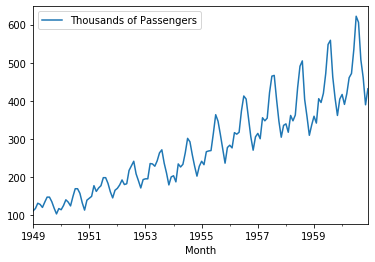

In [6]:
df1.plot()

In [7]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to Reject the null hypothesis
Data has a unit root and is non-stationary


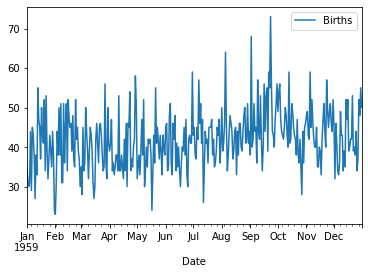

In [8]:
df2.plot()

In [9]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic       -4.808291
p-value                   0.000052
# Lags Used               6.000000
# Observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


## Granger Causality Tests

In [10]:
df3 = pd.read_csv("C:\\Users\\srnva\\Desktop\\NIT Warangal\\Machine Learning\\samples.csv", index_col=0, parse_dates=True)
df3.index.freq = 'MS'

In [11]:
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


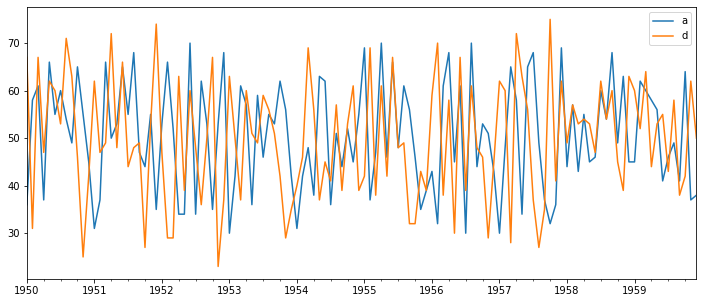

In [12]:
df3[['a','d']].plot(figsize=(12,5))

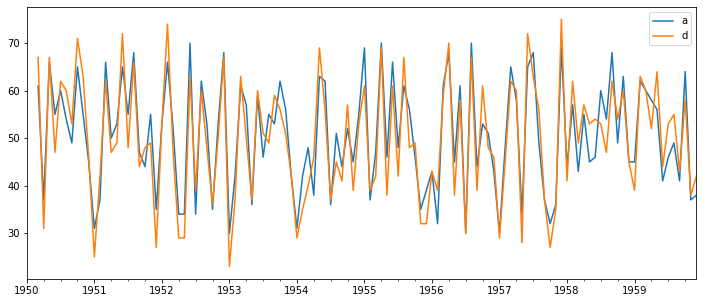

In [13]:
df3['a'].iloc[2:].plot(figsize=(12,5), legend=True)
df3['d'].shift(2).plot(legend=True)

In [14]:
from statsmodels.tsa.stattools import grangercausalitytests

In [15]:
grangercausalitytests(df3[['a','d']],maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


{1: ({'ssr_ftest': (1.7051251051681098, 0.1942027811635688, 116.0, 1),
   'ssr_chi2test': (1.7492231682328023, 0.18597442074424264, 1),
   'lrtest': (1.7364915553187075, 0.18758398456227507, 1),
   'params_ftest': (1.7051251051681153, 0.1942027811635669, 116.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (286.03394262556094, 6.025362015680875e-45, 113.0, 2),
   'ssr_chi2test': (597.3806235365697, 1.9074176679053317e-130, 2),
   'lrtest': (212.65135382912, 6.65802208467127e-47, 2),
   'params_ftest': (286.03394262555724, 6.025362015684541e-45, 113.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (188.74462328616224, 3.2288482941468905e-43, 110.0, 3),
   'ssr_chi2test': (602.2669343040268, 3.2505045874690406e-130, 3),
   'lrtest': (212.4788575746153, 8.48066571559607e-46, 3),
   'params_ftest': (188.7446232861622, 3.2288482941469207e-43, 110.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


In [16]:
grangercausalitytests(df3[['b','d']],maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


{1: ({'ssr_ftest': (1.5225271098609905, 0.219731606038821, 116.0, 1),
   'ssr_chi2test': (1.561902810978085, 0.2113868295267777, 1),
   'lrtest': (1.5517414581131561, 0.21287853854122682, 1),
   'params_ftest': (1.52252710986098, 0.2197316060388221, 116.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4350444134913882, 0.6483153418342387, 113.0, 2),
   'ssr_chi2test': (0.9085883326014834, 0.6348959407829953, 2),
   'lrtest': (0.9051081656513134, 0.636001674473408, 2),
   'params_ftest': (0.4350444134914076, 0.6483153418342305, 113.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5333223212193159, 0.6603817798496363, 110.0, 3),
   'ssr_chi2test': (1.701783043163453, 0.636537457097426, 3),
   'lrtest': (1.6895254112311022, 0.6392650421085297, 3),
   'params_ftest': (0.53332232121931, 0.6603817798496392, 110.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 

## Evaluation

In [17]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20,30,(50,2)), columns=['test','predictions'])

In [18]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


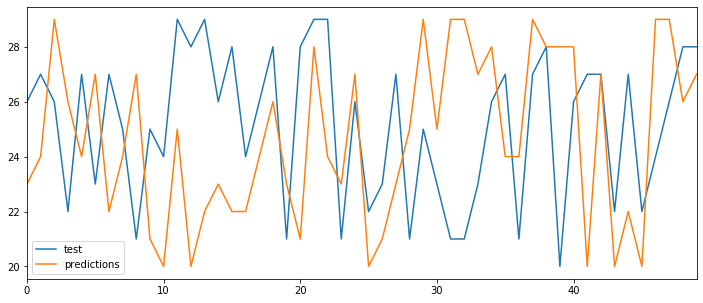

In [19]:
df.plot(figsize=(12,5))

In [20]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs


In [21]:
mse(df['test'], df['predictions'])

17.02

In [22]:
rmse(df['test'], df['predictions'])

4.125530268947253

In [23]:
meanabs(df['test'], df['predictions'])

3.54

## Seasonality

In [24]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


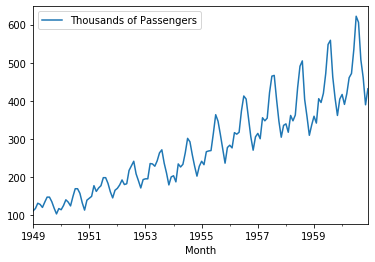

In [25]:
df1.plot()

In [26]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

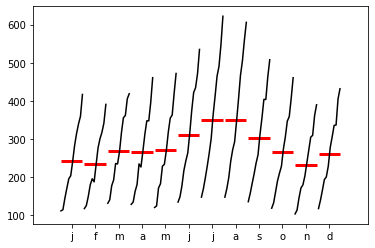

In [27]:
month_plot(df1['Thousands of Passengers']);

In [28]:
dfq = df1['Thousands of Passengers'].resample(rule='Q').mean()

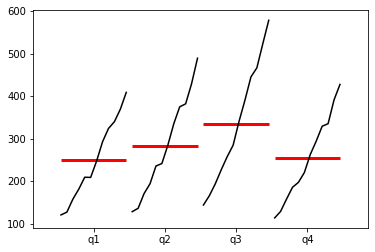

In [29]:
quarter_plot(dfq);